# Evolution de la fréquentation des musées ayant l'appellation "Musée de France" par année (2001-2018)

## Présentation du Projet :

<u>**Groupe :**</u>

- Matthieu SIMOES
- Tom BLACHON

### <u>Recherche et sélection du jeu de données :</u>

Étant issus respéctivement de l'informatique et de la culture, nous avons rapidement décidé de combiner nos deux domaines d'expertises en centrant notre projet autour des institutions culturelles : Musées, archives ou bibliothèques.<br>
Ces intitutions étant majoritairement publiques, nous nous sommes directement tourné vers des plateformes de données gouvernementales afin de trouver notre jeu de données. Nous nous sommes notamment rendu sur [Data.gouv.fr](https://www.data.gouv.fr/fr/), ainsi que sur [Data.Culture.gouv](https://data.culture.gouv.fr/pages/home/), cette dernière plateforme regroupant les données ouvertes du Ministère de la Culture.<br>
Nous avons été surpris de constater la faible quantité de données concernant les archives et bibliothèques. Notre choix s'est donc finalement porté vers un jeu présentant la [fréquentation des musées ayant l'appellation "Musée de France" entre 2001 et 2018](https://data.culture.gouv.fr/explore/dataset/frequentation-des-musees-de-france/information/?sort=-total).

### <u>Présentation du jeu et problématique :</u>

Le terme de "Musée de France" est une appellation attribuée depuis 2003 aux musées respectant un certain nombre de normes et d'engagements. Il s'agit d'un gage de qualité permettant notamment aux institutions de bénéficier de subventions supplémentaires. Aujourd'hui au nombre de 1219, il peut s'agir tant de musées publics (87%) que privés (13%).
Notons que même si l'appellation n'est officiellement attribuée que depuis 2003, notre jeu de données débute en 2001. En effet, certains grands musées disposaient déjà d'un statut similaire avant d'être encadré par des textes de lois en févrirer 2003.

Notre jeu de données regrouppe ainsi la fréquentation de ces musées entre 2001 et 2018. Il contient 21 290 lignes et 12 colonnes. Chaque ligne rassemble les données de fréquentation annuelle d'un musée. Les principales informations en colonne sont réparties de la façon suivante :
- La **référence** du musée : ref_musee
- Le **nom** du musée : nom_du_musee
- La **région** du musée : regions
- Le **département** du musée : departements
- La **ville** du musée : ville
- L'**année** : annee
- Le nombre d'**entrées annuelles payantes** : payant
- Le nombre d'**entrées annuelles gratuites** : gratuit
- Le nombre d'**entrées annuelles totales** : total

Ce jeu présente plusieurs intérêts, à commencer par la possibilité de quantifier les performances de ces musées. En effet, la majorité de ces institutions, notamment publiques, sont à but non lucratif. À l'inverse d'une entreprise, ses performances ne peuvent donc pas se mesurer à travers un chiffre d'affaire et les revenus engendrés. Mais la fréquentation, gratuite ou payante, est quand à elle un indicateur majeur de la croissance annuelle d'un musée.<br>
Un autre intérêt de ce jeu est la présence de données géographiques, permettant de mener des études comparatives, à l'échelle de la France, d'une région ou d'un département. Nous pouvons ainsi nous demander si la fréquentation est répartie uniformément sur l'enssemble du territoire ou s'il existe une fracture géographique.<br>
Le dernier intérêt notable est enfin la mention de données temporelles, nous permettant d'observer et de nous questionner sur l'évolution de la fréquentation de ces musées en près de 20 ans. 

Au regard de ces questions, tenterons de répondre à la problématique suivante : **Comment se répartie la fréquentation des Musées de France sur l'enssemble du territoire français et que constate-t-on de son évolution entre 2001 et 2018 ?**

Pour faciliter notre étude, nous avons préalablement nettoyé notre jeu de données en supprimant les lignes pour lesquelles les informations de fréquentation seraient manquantes à l'aide de la méthode <span style="color: blue;">.dropna()</span>. Ce tri nous a ainsi permis de retirer 3033 lignes de données inexploitables. Nous avons aussi supprimé les colonnes "note" et "commentaire" de la base avec excel. Nous sommes donc partis d'une base de données de 18257 lignes et 10 colonnes.

### Importation des packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importation des données

In [2]:
df=pd.read_csv("frequentation-des-musees-de-france.csv", error_bad_lines=False,sep=";")
df=df.dropna(subset=['gratuit', 'payant','total'])
df.head()

,ref_musee,nom_du_musee,regions,ville,annee,departements,date_appellation,payant,gratuit,total
0,8122001,Musée du Pays Rabastinois,MIDI-PYRENEES,RABASTENS,2009,TARN,01/02/2003,1009.0,3598.0,4607.0
2,5909201,Musée de l'Ostrevant,NORD-PAS-DE-CALAIS,BOUCHAIN,2009,NORD,01/02/2003,217.0,568.0,785.0
3,5918301,Musée des Beaux-Arts,NORD-PAS-DE-CALAIS,DUNKERQUE,2009,NORD,01/02/2003,7837.0,0.0,7837.0
4,5934501,"Musée de la Mine, Centre Historique Minier",NORD-PAS-DE-CALAIS,LEWARDE,2009,NORD,01/02/2003,137845.0,13915.0,151760.0
5,6211901,Musée Régional d'Ethnologie,NORD-PAS-DE-CALAIS,BETHUNE,2009,PAS-DE-CALAIS,01/02/2003,0.0,1850.0,1850.0


In [3]:
df.shape

(18257, 10)

### Fréquentation selon l'année

In [5]:
df.groupby(by=['annee'])['payant','gratuit'].sum()

,payant,gratuit
annee,,
2001,28466349.0,10382830.0
2002,29953221.0,12416890.0
2003,27012323.0,13311906.0
2004,32223957.0,13406772.0
2005,30315726.0,14933647.0
2006,32197378.0,17921286.0
2007,32713354.0,19909054.0
2008,33579952.0,22189175.0
2009,33193708.0,23289275.0


A travers ce tableau, nous avons obtenu un petit aperçu de la fréquentation selon l'année. On peut aussi observer aussi la répartition par année des entrées entre payant et gratuit. Malheureusement on distingue un peu difficilement les écarts entre payants et gratuit car il n'y pas de séparateur des milliers. On a donc réalisé un camembert pour voir les potentiels écarts qui peuvent exister entre les entrées gratuites et payantes.

### Répartition des entrées gratuites et payantes

([<matplotlib.patches.Wedge at 0x23925aea2e8>,
 [Text(-1.038280055111119, 0.36328298495587685, 'Gratuit'),
  Text(1.0382800891241224, -0.3632828877450805, 'Payant')],
 [Text(-0.5663345755151558, 0.19815435543047827, '39.3%'),
  Text(0.566334594067703, -0.19815430240640752, '60.7%')])

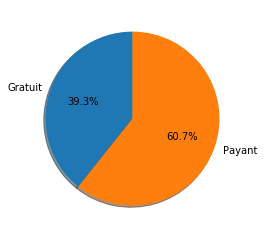

In [6]:
sum_payant=df['payant'].sum()
sum_free=df['gratuit'].sum()
entree=[sum_free,sum_payant]
labels="Gratuit","Payant"
fig1, ax1 = plt.subplots()
ax1.pie(entree, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

Ce diagramme circulaire nous révèle que près de 40% de la fréquentation totale des Musées de France sont des entrées gratuites, contre 60,7% pour les entrées payantes. La répartition n'est certe pas égale mais une part importante est tout de même laissée à la gratuité. Cela témoigne d'une politique tarifaire adaptée dans ces institutions. C'est à dire que les conditions d'accès à la gratuité sont larges : l'âge, la situation professionnelle ou les revenus sont souvent les criètres pris en considération. Celà témoigne, en France, d'une volonté d'ouvrir l'accès à la culture pour tous.

Par ailleurs, nous pouvons constater que la part des entrées payantes reste majoritaire. Si les musées publics n'ont pas pour vocation de rechercher le profit, la part des entrées payantes sert souvent à financer le fonctionnement du musée. Il s'agit uniquement d'une aide financière venant s'ajouter aux subventions de l'État, notamment pour la préparation des futures expositions.<br>
Cependant, il existe également des musées totalement gratuits, ne générant donc aucun revenu.

### Recodage des régions

In [26]:
total_payant_gratuit_regions=df.groupby(by=['regions'])['payant','gratuit','total'].sum()
total_payant_gratuit_regions.loc['AUVERGNE-RHONE-ALPES']=total_payant_gratuit_regions.iloc[[2,3,34]].sum()
total_payant_gratuit_regions.loc['BOURGOGNE-FRANCHE-COMTE']=total_payant_gratuit_regions.iloc[[5,6,12]].sum()
total_payant_gratuit_regions.loc['CENTRE-VAL DE LOIRE']=total_payant_gratuit_regions.iloc[[8,9]].sum()
total_payant_gratuit_regions.loc['GRAND EST']=total_payant_gratuit_regions.iloc[[0,10,13,22]].sum()
total_payant_gratuit_regions.loc['HAUTS-DE-FRANCE']=total_payant_gratuit_regions.iloc[[17,26,31]].sum()
total_payant_gratuit_regions.loc['NORMANDIE']=total_payant_gratuit_regions.iloc[[4,16,27]].sum()
total_payant_gratuit_regions.loc['NOUVELLE-AQUITAINE']=total_payant_gratuit_regions.iloc[[1,21,28,32]].sum()
total_payant_gratuit_regions.loc['OCCITANIE']=total_payant_gratuit_regions.iloc[[20,25,29]].sum()
total_payant_gratuit_regions.loc['SAINT-PIERRE ET MIQUELON']=total_payant_gratuit_regions.iloc[[35,36]].sum()
total_payant_gratuit_regions=total_payant_gratuit_regions.drop(index="RHONE-ALPES")
total_payant_gratuit_regions=total_payant_gratuit_regions.drop(index="AUVERGNE")
total_payant_gratuit_regions=total_payant_gratuit_regions.drop(index="BOURGOGNE")
total_payant_gratuit_regions=total_payant_gratuit_regions.drop(index="FRANCHE-COMTE")
total_payant_gratuit_regions=total_payant_gratuit_regions.drop(index="CENTRE")
total_payant_gratuit_regions=total_payant_gratuit_regions.drop(index="ALSACE")
total_payant_gratuit_regions=total_payant_gratuit_regions.drop(index="CHAMPAGNE-ARDENNES")
total_payant_gratuit_regions=total_payant_gratuit_regions.drop(index="LORRAINE")
total_payant_gratuit_regions=total_payant_gratuit_regions.drop(index="NORD-PAS-DE-CALAIS")
total_payant_gratuit_regions=total_payant_gratuit_regions.drop(index="PICARDIE")
total_payant_gratuit_regions=total_payant_gratuit_regions.drop(index="BASSE-NORMANDIE")
total_payant_gratuit_regions=total_payant_gratuit_regions.drop(index="HAUTE-NORMANDIE")
total_payant_gratuit_regions=total_payant_gratuit_regions.drop(index="AQUITAINE")
total_payant_gratuit_regions=total_payant_gratuit_regions.drop(index="LIMOUSIN")
total_payant_gratuit_regions=total_payant_gratuit_regions.drop(index="POITOU-CHARENTES")
total_payant_gratuit_regions=total_payant_gratuit_regions.drop(index="LANGUEDOC-ROUSSILLON")
total_payant_gratuit_regions=total_payant_gratuit_regions.drop(index="MIDI-PYRENEES")
total_payant_gratuit_regions=total_payant_gratuit_regions.drop(index="ST PIERRE ET MIQUELON")
total_payant_gratuit_regions

,payant,gratuit,total
regions,,,
AUVERGNE-RHONE-ALPES,28592516.0,25910207.0,54502723.0
BOURGOGNE-FRANCHE-COMTE,16427128.0,14687692.0,31114820.0
BRETAGNE,11563943.0,7759100.0,19323043.0
CENTRE-VAL DE LOIRE,10503350.0,8575334.0,19078684.0
CORSE,3180620.0,1372375.0,4552995.0
GRAND EST,28537338.0,21666415.0,50203753.0
GUADELOUPE,96995.0,299860.0,396855.0
GUYANE,90885.0,226989.0,317874.0
HAUTS-DE-FRANCE,21742793.0,16487804.0,38230597.0


In [27]:
total_trie=total_payant_gratuit_regions.sort_values(by='total',ascending=False)
top_10_entree=total_trie.iloc[0:10,2]
regions=df['regions'].unique()
regions_10=['IDF',"PACA","AURA","OCCITANIE",'GRAND EST','NORMANDIE','HAUTS-DE-FRANCE','NOUVELLE-AQUITAINE','BOURGOGNE FRANCHE COMTE','PAYS DE LA LOIRE']
top_10_entree

regions
ILE-DE-FRANCE                 564064831.0
PROVENCE-ALPES-CÔTE D'AZUR     61693823.0
AUVERGNE-RHONE-ALPES           54502723.0
GRAND EST                      50203753.0
OCCITANIE                      49387550.0
HAUTS-DE-FRANCE                38230597.0
NORMANDIE                      35742219.0
NOUVELLE-AQUITAINE             33471635.0
BOURGOGNE-FRANCHE-COMTE        31114820.0
PAYS DE LA LOIRE               22787536.0
Name: total, dtype: float64

### Répartition des entrées selon les régions

<BarContainer object of 10 artists>

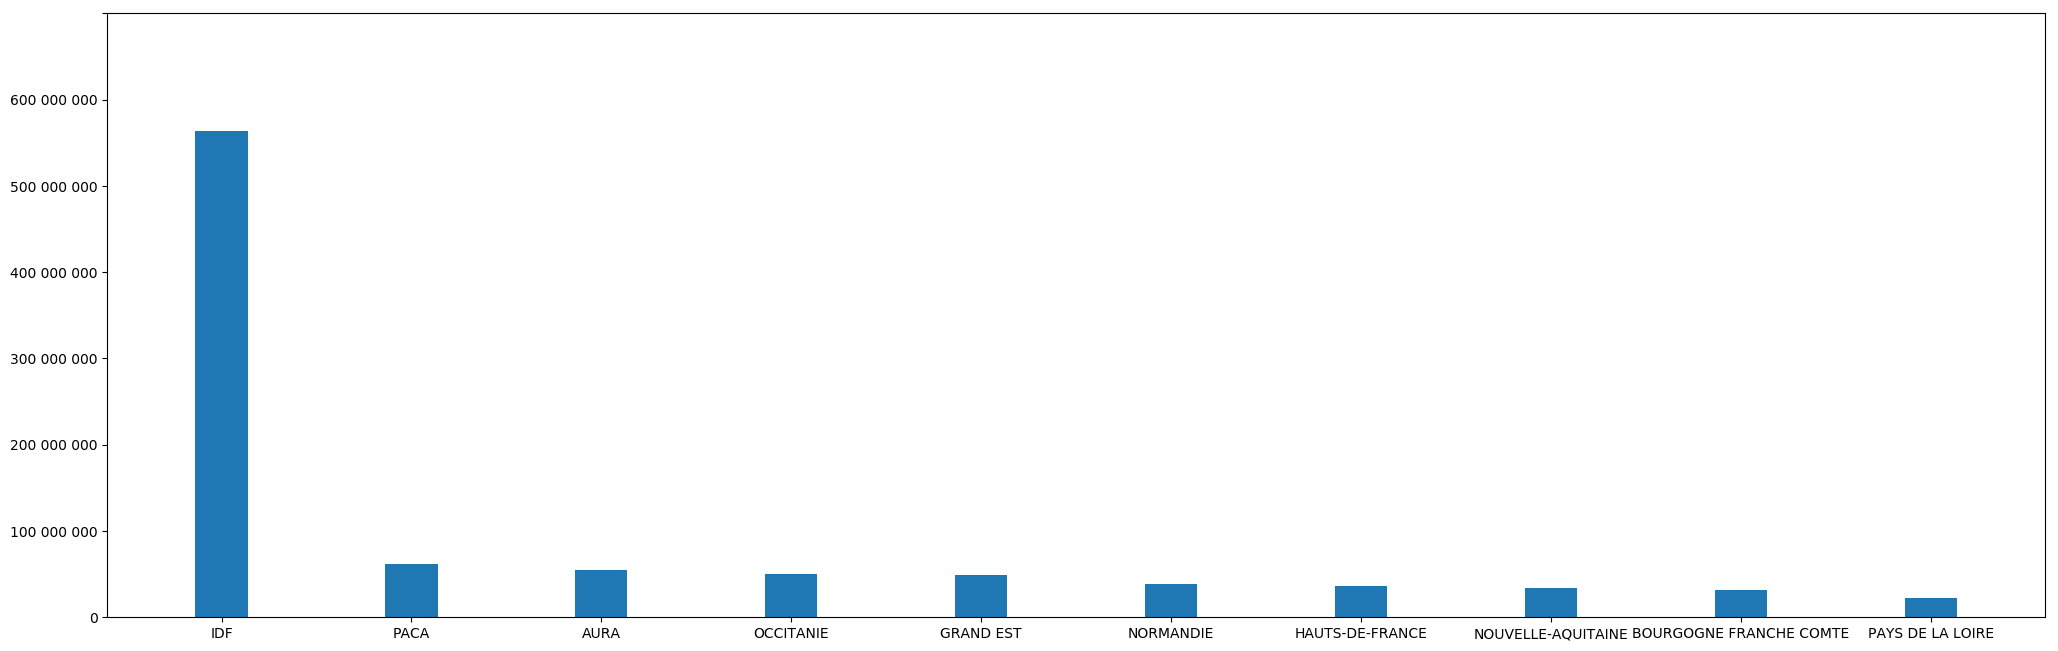

In [28]:
fig= plt.figure
fig(figsize=(25,8), dpi=100)
axes = plt.gca()
axes.set_ylim(0,700000000)
axes.yaxis.set_ticklabels(['0','100 000 000', '200 000 000', '300 000 000', '400 000 000', '500 000 000', '600 000 000'])
plt.bar(regions_10,height=top_10_entree,width=0.275)

Ce graphique en barres représente les 10 régions dans lesquelles la fréquentation totale est la plus forte. Pour le réaliser, nous avons dû préalablement fusionner les chiffres de fréquentation des régions qui ont été renommées et regrouppées en 2016.

Nous pouvons constater que l'écrasante majorité de la fréquentation se trouve en Île-de-France, comptabilisant un nombre d'entrées 9 fois suppérieur à celui de la région PACA, en seconde position. Il y a donc véritablement une fracture entre la région parisienne et le reste du pays, qui peut s'expliquer par deux facteurs majeurs :
- D'une part, le tourisme, notamment étranger, est [plus important en Île-de-France qu'en région](https://fr.wikipedia.org/wiki/Tourisme_en_France#Statistiques_de_fr%C3%A9quentation_des_sites_touristiques_en_France), entraînant logiquement une fréquentation plus importante de ses musées.
- D'autre part, la région parisienne regroupe les musées le plus importants de France, en terme de taille et de collections, et jouissent donc naturellement d'une plus grande réputation. Le musée du Louvre et le chateau-musée de Versailles notamment, comptabilisaient à eux deux plus de 18 millions d'entrées en 2018.

L'observation de ce graphique soulève toutefois de nouveaux questionnements. Nous pouvons en effet nous demander si ces chiffres s'expliquent par le fait que le public de province va moins au musée que les parisiens.<br>
Par ailleurs, cela nous interroge sur la question de la répartition des biens culturels et la politique des équipements culturels à l'échelle du territoire. Les principales oeuvres majeures se trouvant dans des musées parisiens, en quoi celà accentue cette fracture géographique ?

### Focus sur les départements

In [29]:
total_payant_gratuit_dep=df.groupby(by=['departements'])['payant','gratuit','total'].sum()
total_dep_trie=total_payant_gratuit_dep.sort_values(by='total',ascending=False)
total_dep_trie=total_dep_trie.drop(index="PARIS")
total_dep_trie=total_dep_trie.drop(index="YVELINES")
total_dep_trie=total_dep_trie.drop(index="HAUTS DE SEINE")
total_dep_trie=total_dep_trie.drop(index="SEINE SAINT-DENIS")
total_dep_trie=total_dep_trie.drop(index="SEINE ET MARNE")
total_dep_trie=total_dep_trie.drop(index="ESSONNE")
total_dep_trie=total_dep_trie.drop(index="VAL DE MARNE")
total_dep_trie=total_dep_trie.drop(index="VAL D'OISE")
top_10_entree_dep=total_dep_trie.iloc[0:10,2]
top_10_entree_dep

departements
BOUCHES DU RHONE    25300430.0
ALPES-MARITIMES     24442414.0
NORD                23168947.0
CALVADOS            19588654.0
RHÔNE               19416982.0
HAUT-RHIN           15890409.0
ISERE               10729562.0
BAS-RHIN            10635632.0
LOIRE-ATLANTIQUE    10489423.0
SEINE-MARITIME      10453179.0
Name: total, dtype: float64

<BarContainer object of 10 artists>

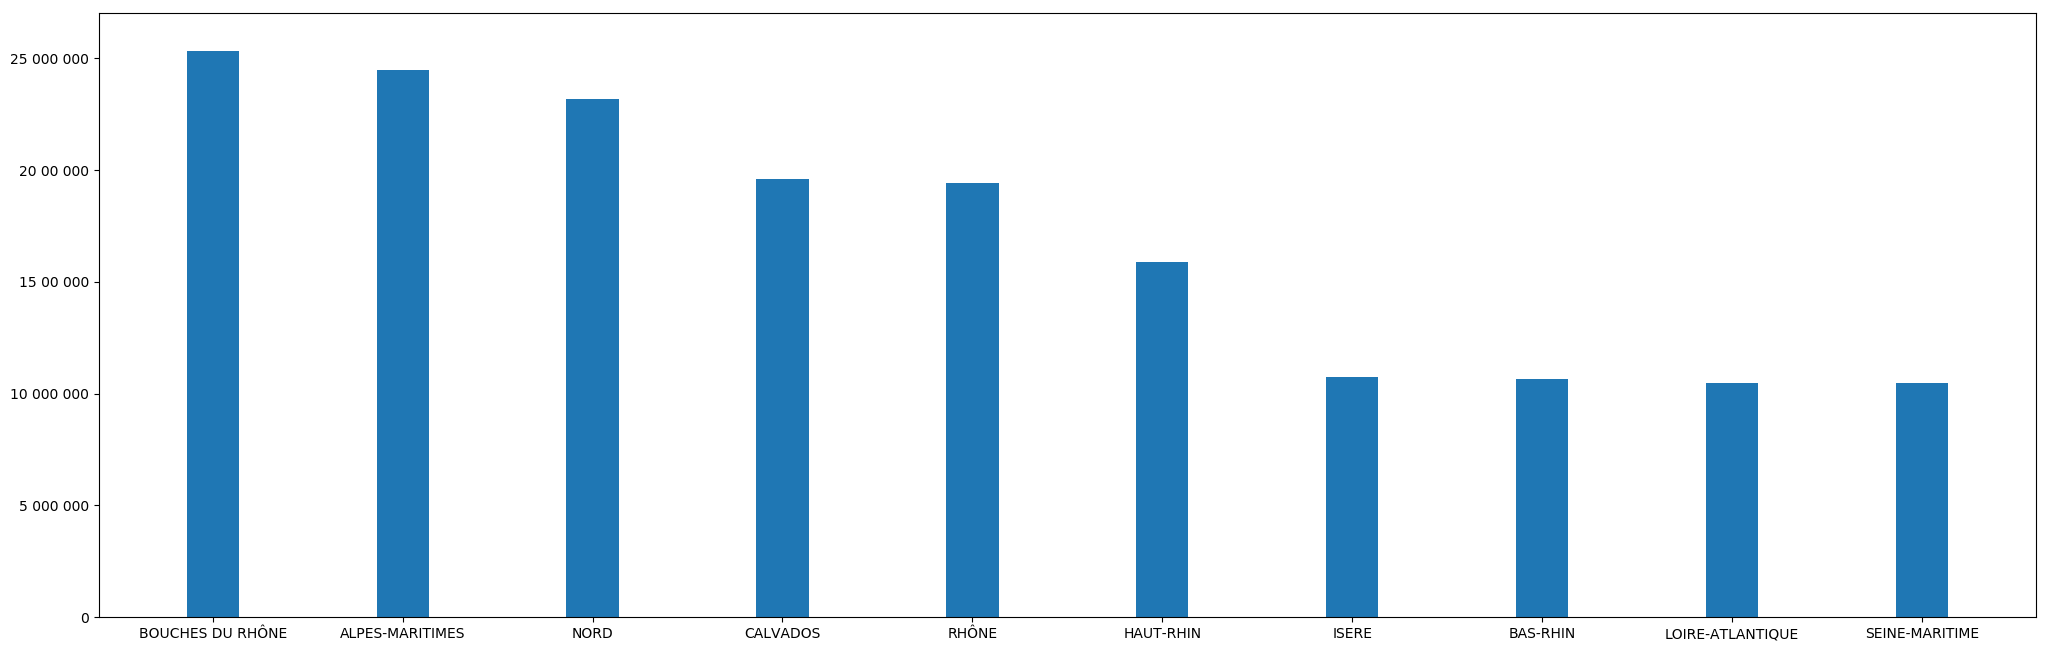

In [30]:
departements_10=['BOUCHES DU RHÔNE','ALPES-MARITIMES','NORD','CALVADOS','RHÔNE','HAUT-RHIN','ISERE','BAS-RHIN','LOIRE-ATLANTIQUE','SEINE-MARITIME']
fig= plt.figure
fig(figsize=(25,8), dpi=100)
axes = plt.gca()
axes.set_ylim(0,27000000)
axes.yaxis.set_ticklabels(['0','5 000 000', '10 000 000', '15 00 000', '20 00 000', '25 000 000'])
plt.bar(departements_10,height=top_10_entree_dep,width=0.275)

Ce graphique en barres vise à montrer les 10 départements, hors Île-de-France, dans lesquelles la fréquentation totale est la plus forte.

À nouveau, nous constatons une forte coréllation entre la fréquentation des musées et les départements où le tourisme est le plus important. En effet, les Bouches du Rhône et les Alpes-Maritimes comptent parmis les [départements les plus touristiques de France](https://www.actualitix.com/tourisme-par-departement.html), notamment en période estivale. Pour le Nord et le Calvados, il s'agit de territoires fortement marqués par l'Histoire contemporaine et notamment les deux guerres mondiales. Celà peut expliquer leur place dans ce classement, en plus d'un important tourisme anglo-saxon et américain.<br>
Nous pouvons également remarquer que les départements pour lesquels la fréquentation muséale est la plus élevée disposent tous d'une grande métropole française. Dans l'odre : Marseille, Nice, Lille, Caen, Lyon...

In [31]:
regions_annee=pd.pivot_table(df,index=["regions"],values=["total"],
               columns=["annee"],aggfunc=np.sum)
regions_annee.loc['AUVERGNE-RHONE-ALPES']=regions_annee.iloc[[2,3,34]].sum()
regions_annee.loc['BOURGOGNE-FRANCHE-COMTE']=regions_annee.iloc[[5,6,12]].sum()
regions_annee.loc['CENTRE-VAL DE LOIRE']=regions_annee.iloc[[8,9]].sum()
regions_annee.loc['GRAND EST']=regions_annee.iloc[[0,10,13,22]].sum()
regions_annee.loc['HAUTS-DE-FRANCE']=regions_annee.iloc[[17,26,31]].sum()
regions_annee.loc['NORMANDIE']=regions_annee.iloc[[4,16,27]].sum()
regions_annee.loc['NOUVELLE-AQUITAINE']=regions_annee.iloc[[1,21,28,32]].sum()
regions_annee.loc['OCCITANIE']=regions_annee.iloc[[20,25,29]].sum()
regions_annee.loc['SAINT-PIERRE ET MIQUELON']=regions_annee.iloc[[35,36]].sum()
regions_annee=regions_annee.drop(index="RHONE-ALPES")
regions_annee=regions_annee.drop(index="AUVERGNE")
regions_annee=regions_annee.drop(index="BOURGOGNE")
regions_annee=regions_annee.drop(index="FRANCHE-COMTE")
regions_annee=regions_annee.drop(index="CENTRE")
regions_annee=regions_annee.drop(index="ALSACE")
regions_annee=regions_annee.drop(index="CHAMPAGNE-ARDENNES")
regions_annee=regions_annee.drop(index="LORRAINE")
regions_annee=regions_annee.drop(index="NORD-PAS-DE-CALAIS")
regions_annee=regions_annee.drop(index="PICARDIE")
regions_annee=regions_annee.drop(index="BASSE-NORMANDIE")
regions_annee=regions_annee.drop(index="HAUTE-NORMANDIE")
regions_annee=regions_annee.drop(index="AQUITAINE")
regions_annee=regions_annee.drop(index="LIMOUSIN")
regions_annee=regions_annee.drop(index="POITOU-CHARENTES")
regions_annee=regions_annee.drop(index="LANGUEDOC-ROUSSILLON")
regions_annee=regions_annee.drop(index="MIDI-PYRENEES")
regions_annee=regions_annee.drop(index="ST PIERRE ET MIQUELON")
regions_annee

total                                      \
annee                             2001        2002        2003        2004   
regions                                                                      
AUVERGNE-RHONE-ALPES         2699938.0   2863018.0   2672851.0   2628873.0   
BOURGOGNE-FRANCHE-COMTE      1648405.0   1784141.0   1756259.0   1870491.0   
BRETAGNE                      887729.0   1257769.0   1247726.0   1044428.0   
CENTRE-VAL DE LOIRE          1026973.0   1114070.0   1026124.0   1068275.0   
CORSE                         238579.0    245879.0    217129.0    199493.0   
GRAND EST                    2226488.0   2294099.0   2489748.0   2430739.0   
GUADELOUPE                     18301.0     10352.0      6582.0      2479.0   
GUYANE                         16612.0     11776.0      5366.0     14831.0   
HAUTS-DE-FRANCE              1412008.0   1692971.0   1613349.0   2453074.0   
ILE-DE-FRANCE               19727797.0  21324597.0  19805234.0  23926468.0   
LA REUNION                    131254.0    130715.0    121480.0    116421.0   
MARTINIQUE                     47346.0      9599.0     39441.0     57711.0   
MAYOTTE                            NaN         NaN         NaN         NaN   
NORMANDIE                    1598057.0   1884859.0   1768767.0   2069405.0   
NOUVELLE-AQUITAINE           1572947.0   1736301.0   1678588.0   1729195.0   
OCCITANIE                    2030159.0   2169516.0   2144727.0   2391215.0   
PAYS DE LA LOIRE              970721.0    986077.0   1008786.0    999690.0   
PROVENCE-ALPES-CÔTE D'AZUR   2595865.0   2854372.0   2722072.0   2627941.0   
SAINT-PIERRE ET MIQUELON           0.0         0.0         0.0         0.0   

                                                                            \
annee                             2005        2006        2007        2008   
regions                                                                      
AUVERGNE-RHONE-ALPES         2574085.0   2593938.0   2525531.0   2704901.0   
BOURGOGNE-FRANCHE-COMTE      1644093.0   1650370.0   1661813.0   1660684.0   
BRETAGNE                      970047.0   1015972.0   1098421.0   1069123.0   
CENTRE-VAL DE LOIRE          1040409.0   1007699.0   1057973.0   1079511.0   
CORSE                         197243.0    202410.0    231785.0    205755.0   
GRAND EST                    2623855.0   2363885.0   2433604.0   2496977.0   
GUADELOUPE                      2000.0      9639.0     20184.0     15379.0   
GUYANE                         19171.0     14310.0     14749.0     19392.0   
HAUTS-DE-FRANCE              1739498.0   1574572.0   1897725.0   1776500.0   
ILE-DE-FRANCE               24970430.0  29678101.0  31073402.0  33078659.0   
LA REUNION                    124879.0     98591.0    104127.0    106147.0   
MARTINIQUE                     52308.0     78160.0     73212.0     59401.0   
MAYOTTE                            NaN         NaN         NaN         NaN   
NORMANDIE                    1896167.0   1840065.0   1914465.0   1957593.0   
NOUVELLE-AQUITAINE           1714042.0   1748194.0   1877268.0   1875386.0   
OCCITANIE                    2143461.0   2161628.0   2626365.0   2994689.0   
PAYS DE LA LOIRE              919545.0    921542.0   1289183.0   1269016.0   
PROVENCE-ALPES-CÔTE D'AZUR   2616436.0   3159588.0   2721325.0   3398595.0   
SAINT-PIERRE ET MIQUELON        1704.0         0.0      1276.0      1419.0   

                                                                            \
annee                             2009        2010        2011        2012   
regions                                                                      
AUVERGNE-RHONE-ALPES         2877987.0   2948094.0   2956785.0   2854325.0   
BOURGOGNE-FRANCHE-COMTE      1697432.0   1699086.0   1682240.0   1741172.0   
BRETAGNE                     1068360.0    991643.0    974800.0    925364.0   
CENTRE-VAL DE LOIRE          1091180.0   1093302.0   1121610.0   1104672.0   
CORSE                         217859.0    285291.0   

Ce tableau expose le nombre d'entrées annuelles totales par régions.

En étudiant les chiffres, nous pouvons observer que la fréquentation baisse fortement en Île-de-France en 2015 et 2016, tandis qu'elle reste constante dans les autres régions. En effet, jusqu'alors en augmentation constante et avec plus de 38 millions d'entrées en 2014, la fréquentation tombe à 33 millions d'entrées en 2016.<br>
Cette baisse s'explique par les attentats parisiens de Charlie Hebdo et du Bataclan en 2015 et au public fréquentant ces musées. [Les touristes étrangers sont moins présents dans la capitale](http://pro.visitparisregion.com/chiffres-tourisme-paris-ile-de-france/frequentation-touristique-paris/Bilans/Bilan-de-l-annee-touristique-2015-a-Paris-Ile-de-France-fevrier-2016) et délaissent donc les musées de Paris.<br>
Dans les autres régions, à l'inverse, le public est un public local qui continue donc de se rendre au musée, ce qui permet de maintenir la croissance.

### Evolution des entrées selon l'année

In [32]:
x=np.arange(2001,2019,1)
total=df.groupby(by=['annee'])['total'].sum()
total=np.array(total)
free=df.groupby(by=['annee'])['gratuit'].sum()
free=np.array(free)
payant=df.groupby(by=['annee'])['payant'].sum()
payant=np.array(payant)

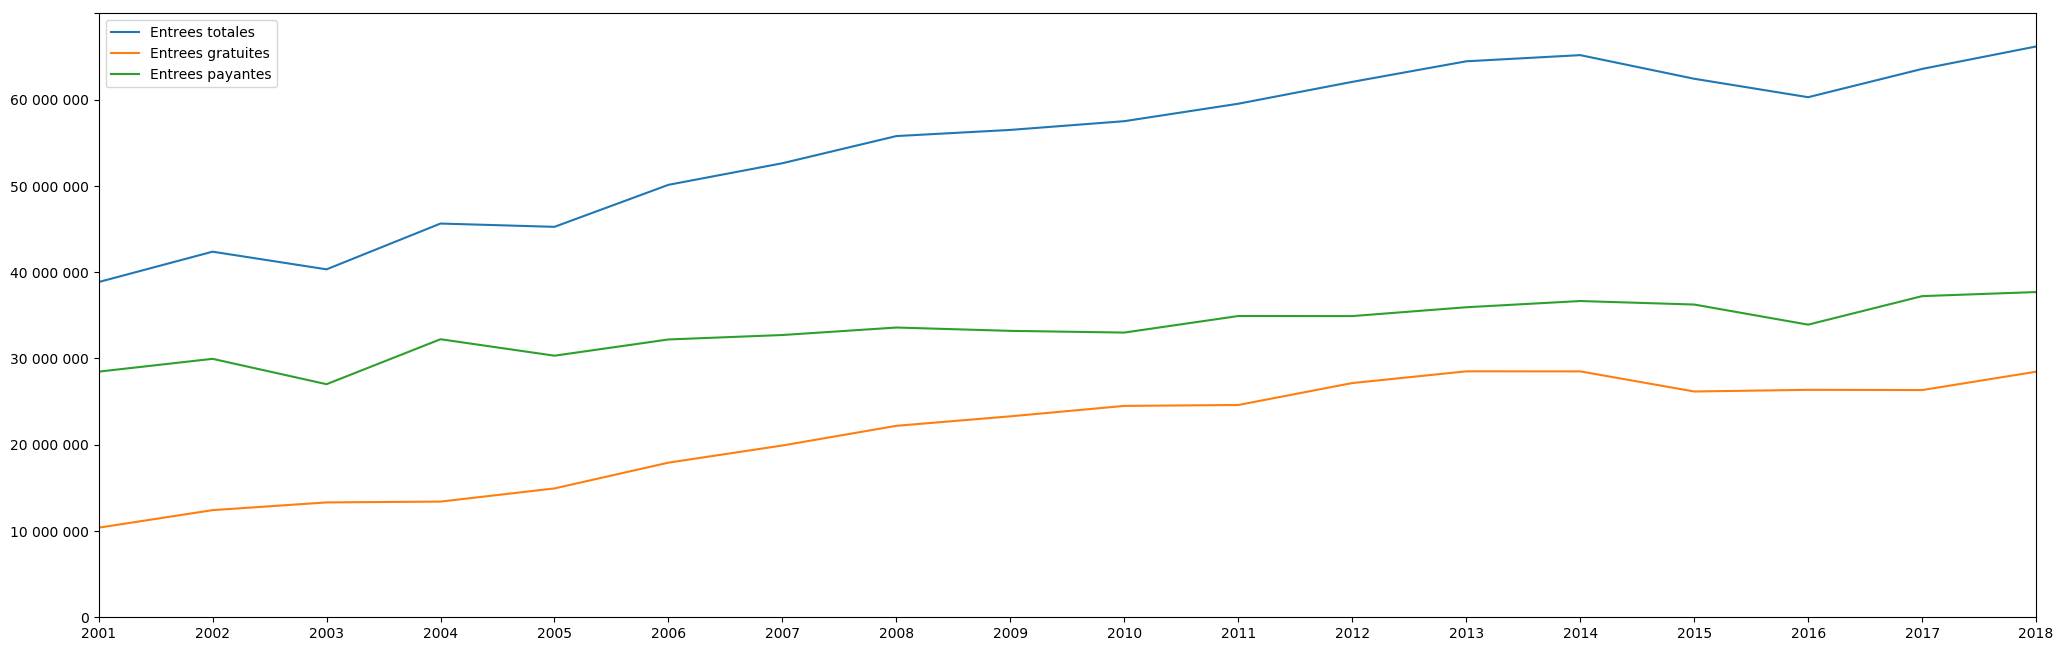

In [33]:
fig= plt.figure
fig(figsize=(25,8), dpi=100)
axes = plt.gca()
axes.set_xlim(2001,2018)
axes.xaxis.set_ticks(range(2001,2019))
axes.set_ylim(0,70000000)
axes.xaxis.set_ticklabels(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010','2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
axes.yaxis.set_ticklabels(['0','10 000 000', '20 000 000', '30 000 000', '40 000 000', '50 000 000', '60 000 000'])
plt.plot(x,total,label="Entrees totales")
plt.plot(x,free,label="Entrees gratuites")
plt.plot(x,payant,label="Entrees payantes")
plt.legend()

Ce dernier graphique en courbe représente l'évolution du nombre d'entrées gratuites, payantes et totales entre 2001 et 2018.

Nous pouvons remarquer que la fréquentation totale est en augmentation preque constante et a presque doublée en 18 ans.<br>
La courbe des entrées payantes connait une faible augmentation tandis que les entrées gratuites ont plus que doublées. Cela montre que la mise en place d'une politique tarifaire adaptée afin de rendre la culture plus accessible a porté ses fruits.

Notons également la décroissance de la fréquentation totale en 2015 et 2016. Cette cassure nette de la courbe confirme l'impact de la baisse du nombre d'entrées en Île-de-France sur le nombre d'entrées totales, suite aux attaques terroristes.<br>

### En conclusion

L'étude de notre jeu de données nous a montré que la fréquentation des musées possédant l'appellation "Musée de France" a connu une forte croissance entre 2001 et 2018, passant de 38 millions d'entrées annuelles en 2001 à plus de 66 millions en 2018 sur l'ensemble du territoire.<br>
De plus, les mesures gouvernementales visant à élargir les conditions de gratuité dans les musées pour un accès plus large à la culture s'avère payant. Les entrées gratuites sont en effet passées de 10 millions à 28 millions entre 2001 et 2018, soit une augmentation de 174%. Les entrées payantes n'ont quand à elles augmentée que de 32% sur la période.<br>
Le fonctionnement des musées a changé en 18 ans et cela explique surement cette augmentation globale. En effet, si au début de la période les musées étaient encore dans une logique de visiteur unique, ils se sont progressivement dirigés vers la mise en place d'une programmation culturelle et d'expositions régulières. L'objectif est aujourd'hui pour ces institutions de créer l'évênement pour faire revenir le visiteur.

Cependant, si l'on constate une augmentation de la fréquentation, celle-ci n'est toujours pas répartie de manière uniforme sur le territoire. Une fracture forte demeure entre l'Île-de-France et les autres régions. En 2018, la région parisienne représentait encore 59% de la fréquentation totale en France. Mais si Paris est particulièrement dépendante de son tourisme, le public de province, plus loccal permet une croissance plus lente mais également plus stable.

Malheureusement, il nous est impossible d'identifier plus précisément les types de publics à travers notre jeu de données, qui présente des limites. Nous aurions aimé d'avantage d'information sur les publics, comme leur âge ou leur nationalité, ce qui aurait permis d'affiner notre analyse et de mieux expliquer certaines baisses de fréquentation, notamment en 2015 après les atentats.<br>
De plus, notre jeu se limite aux "Musées de France". Bien qu'ils représentent aujourd'hui la majorité des musées français, cela ne nous a pas permis de mener une étude exaustive sur l'ensemble des musées en France. Cette appellation n'étant d'ailleurs pas clairement définie entre 2001 et 2003, il est donc possible que certaines données de cette période soient erronées.<br>
Enfin, il est dommage que notre jeu de données se limite à 2018. En effet, si l'on observe une baisse de la fréquentation suite aux atentats de 2015, nous pouvons légitimement nous demander ce qu'il en sera des chiffres de ces deux dernières années. 2019 a été marquée par la fermeture de nombreuses institution les weekends, durant le mouvement des Gilets Jaunes. Quant à 2020, la crise sanitaire du COVID19 a obligé les musées à fermer leurs portes durant plus de 4 mois. Nul doute que les répercussions sur la fréquentation doivent être désastreuses...